# Question 1 - A

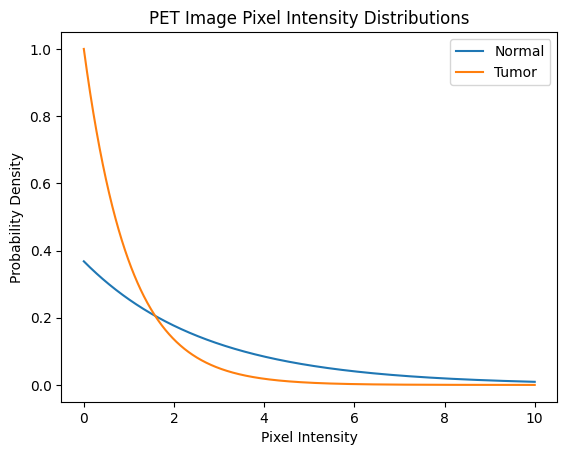

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the distributions
def normal_distribution(x):
    beta_n = np.exp(1)
    return (1/beta_n) * np.exp(-x/beta_n) if x >= 0 else 0

def tumor_distribution(x):
    beta_t = 1
    return (1/beta_t) * np.exp(-x/beta_t) if x >= 0 else 0

# Generate x values
x_values = np.linspace(0, 10, 1000)

# Plot the distributions
plt.plot(x_values, [normal_distribution(x) for x in x_values], label='Normal')
plt.plot(x_values, [tumor_distribution(x) for x in x_values], label='Tumor')
plt.xlabel('Pixel Intensity')
plt.ylabel('Probability Density')
plt.legend()
plt.title('PET Image Pixel Intensity Distributions')
plt.show()


# Question 1 - B
Since the prior probabilities of the classes are the same, the minimum error classification rule is to classify a pixel as tumor if p(tumor|x)>p(normal|x) and as normal otherwise. The vertical line represents the intersection of the two classes and where the two classes are distinguishable.


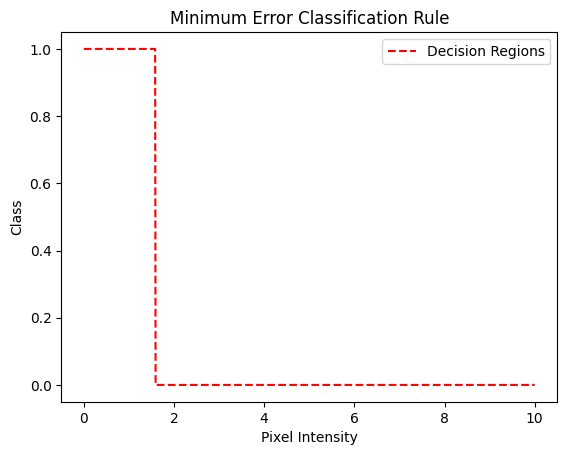

In [2]:
# Classification rule
def minimum_error_classification_rule(x):
    return 1 if tumor_distribution(x) > normal_distribution(x) else 0

# Plot decision regions
decision_regions = [minimum_error_classification_rule(x) for x in x_values]
plt.plot(x_values, decision_regions, label='Decision Regions', color='r', linestyle='--')
plt.xlabel('Pixel Intensity')
plt.ylabel('Class')
plt.legend()
plt.title('Minimum Error Classification Rule')
plt.show()


# Question 1 - C
Since the prior probability of normal tissue decreased to 1.64 times that of tumor tissue, the intersection point along the x-axis is shifted to the left, hence narrowing our minimum rejection region. Essentially we have a wider range of proper classification.

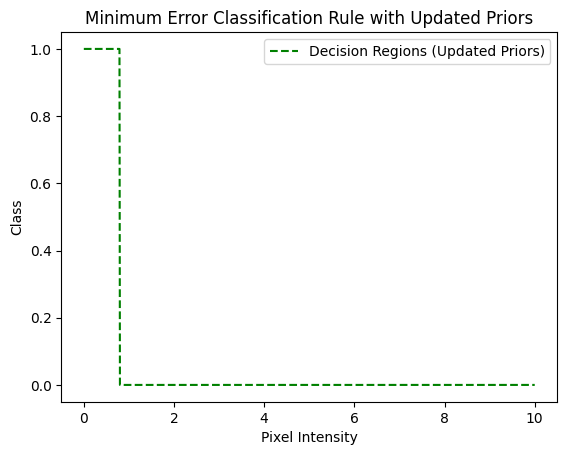

In [3]:
# Assuming the prior probability of normal tissue is 1.64 times that of tumor tissue
prior_normal = 1.64 # Beta n
prior_tumor = 1 # Beta t

# Updated classification rule
def minimum_error_classification_rule_updated_priors(x):
    posterior_normal = normal_distribution(x) * prior_normal
    posterior_tumor = tumor_distribution(x) * prior_tumor
    return 1 if posterior_tumor > posterior_normal else 0

# Plot updated decision regions
decision_regions_updated_priors = [minimum_error_classification_rule_updated_priors(x) for x in x_values]
plt.plot(x_values, decision_regions_updated_priors, label='Decision Regions (Updated Priors)', color='g', linestyle='--')
plt.xlabel('Pixel Intensity')
plt.ylabel('Class')
plt.legend()
plt.title('Minimum Error Classification Rule with Updated Priors')
plt.show()


# Question 1 - D
Posterior probabilities of both normal and tumor classes:

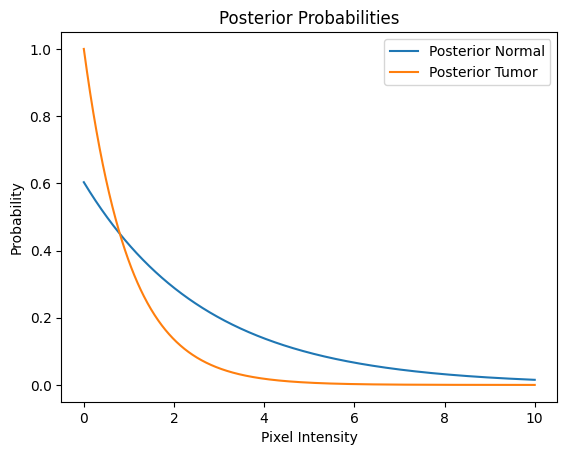

In [4]:
# Calculate posterior probabilities
posterior_normal = [normal_distribution(x) * prior_normal for x in x_values]
posterior_tumor = [tumor_distribution(x) * prior_tumor for x in x_values]

# Plot posterior probabilities
plt.plot(x_values, posterior_normal, label='Posterior Normal')
plt.plot(x_values, posterior_tumor, label='Posterior Tumor')
plt.xlabel('Pixel Intensity')
plt.ylabel('Probability')
plt.legend()
plt.title('Posterior Probabilities')
plt.show()


# Question 1 - E
Misclassification with 90% rejection region threshold

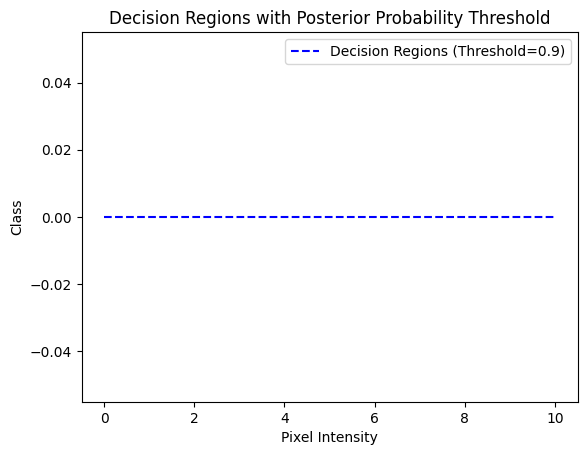

In [5]:
# Set threshold for posterior probabilities
threshold = 0.9 # 90% rejection region threshold

# Updated classification rule with threshold
def threshold_classification_rule(x):
    posterior_normal = normal_distribution(x) * prior_normal
    posterior_tumor = tumor_distribution(x) * prior_tumor
    return 1 if posterior_tumor > threshold * (posterior_tumor + posterior_normal) else 0

# Plot decision regions with threshold
decision_regions_threshold = [threshold_classification_rule(x) for x in x_values]
plt.plot(x_values, decision_regions_threshold, label=f'Decision Regions (Threshold={threshold})', color='b', linestyle='--')
plt.xlabel('Pixel Intensity')
plt.ylabel('Class')
plt.legend()
plt.title('Decision Regions with Posterior Probability Threshold')
plt.show()


# Question 1 - F
The shift in the decision region towards higher pixel intensities (toward the tumor distribution) is due to the fact that the cost of misclassifying a tumor pixel as normal is significantly higher than the cost of misclassifying a normal pixel as a tumor. By adjusting the decision boundary, we minimize the expected risk, considering the misclassification costs.

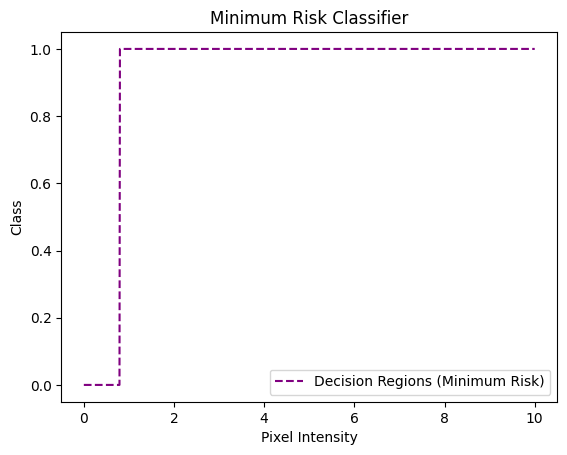

In [6]:
# Define misclassification costs
cost_normal_as_tumor = 1
cost_tumor_as_normal = np.exp(5)
cost_tumor_as_normal = int(cost_tumor_as_normal)

# Calculate expected risks
risk_normal = cost_normal_as_tumor * posterior_normal
risk_tumor = cost_tumor_as_normal * posterior_tumor

# Updated classification rule with minimum risk
def minimum_risk_classification_rule(x):
    return 1 if risk_tumor[x] < risk_normal[x] else 0

# Plot decision regions with minimum risk
decision_regions_minimum_risk = [minimum_risk_classification_rule(x) for x in range(len(x_values))]
plt.plot(x_values, decision_regions_minimum_risk, label='Decision Regions (Minimum Risk)', color='purple', linestyle='--')
plt.xlabel('Pixel Intensity')
plt.ylabel('Class')
plt.legend()
plt.title('Minimum Risk Classifier')
plt.show()
